In [4]:
#Question: Use t-SNE to reduce the MNIST dataset to 2Ds and plot the result
# using Matplotlib.You can use a scatterplot using 10 colors to represent 
#  each image's target class

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

mnist = datasets.fetch_openml('mnist_784', version=1, as_frame=False)
np.random.seed(42)

#Dimensionality reduction on full 60000 images take a very long time, so 
#we only do on a random subset of 10000 images

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]


In [6]:
# Now we use t-SNE to reduce the dimensionality down to 2D so
#  we can plot the dataset
from sklearn.manifold  import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

In [7]:
#Now we use Matplotlib's scatter() function to plot a scatterplot, using a 
#different color for each digit

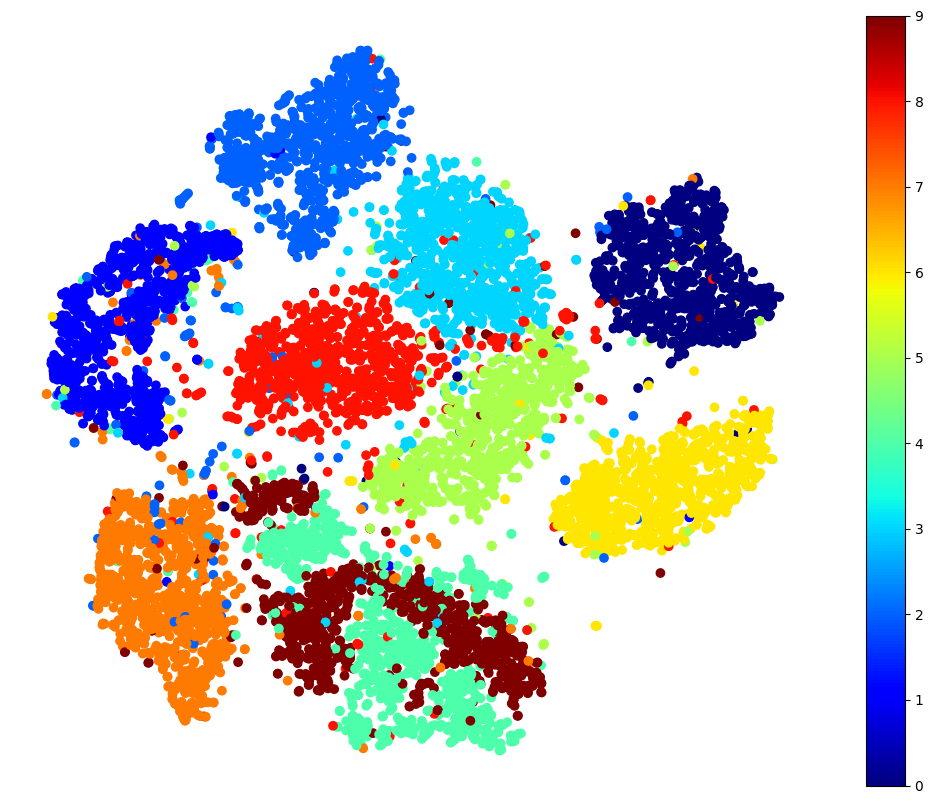

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure y is numeric
y = y.astype(int)  # Convert from string to integer

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15444\1016924133.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("jet")


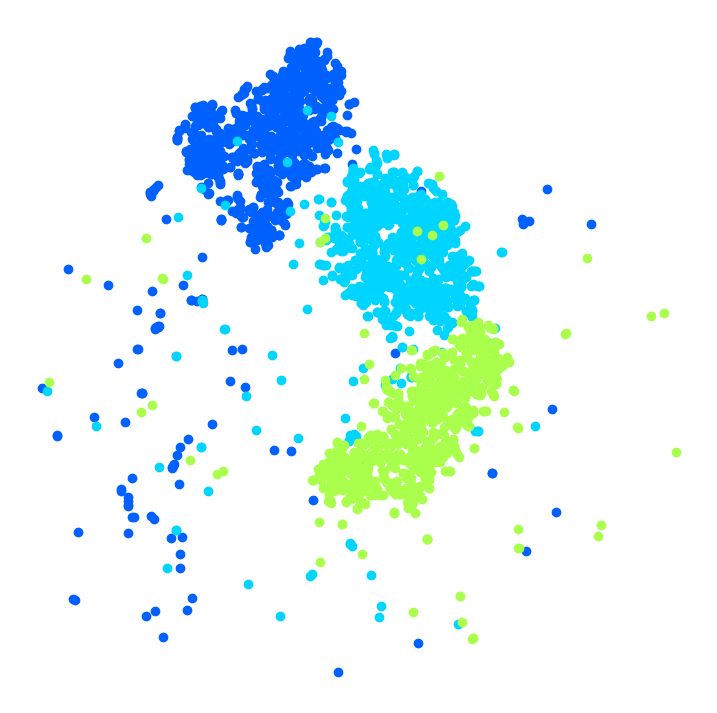

In [9]:
# the plot tells which numbers are easily distinguishable from others
# and also tells which numbers are often hard to distiguish(eg: 4s and 9s, 5s and 3s , and so on)
# Here we focus on the digits 2, 3 , and 5
import matplotlib as mpl
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y==digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()    


In [10]:
# Running t-SNE on these 3 digits
idx = (y==2) | (y ==3) | (y==5) 
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state = 42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

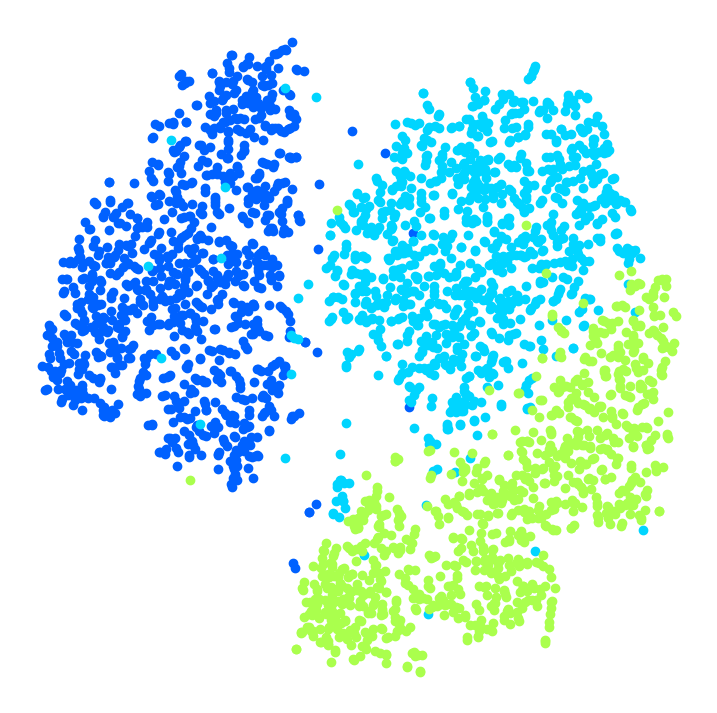

In [11]:
plt.figure(figsize=(9,9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset== digit, 1], c=[cmap(digit / 9)])
plt.axis('off')    
plt.show()

In [12]:
# EXercise: Alternatively you can write digits at the location of each instance,
# or even plot scaled_down versions of the digit images themselves(if you plot all the digits, the visualization will be too cluttered,
# so you should either draw a random sample or plot an instance only if no other instances have already 
# been plotted at a close distance).You should get a  nice visualization with well separated clusters of digits


In [13]:
# Let create a plot_digits() function that will draw a scatterplot(similar to the above scatterplots)
# plus write colored digits, with a minimum distance guaranteed b/w these digits.If the digit images are
# provided, they are plotted instead.This implementation was inspired from one of the Scikit-Learn's
# excellent example(plot_lle_digits, based on a different digit dataset)

In [14]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13,10)):
    #Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # we pretend that one is already plotted far away at the start, to
    # avoid 'if' statement in the loop below
    neighbors  = np.array([[10., 10.]]) 
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y==digit, 0],X_normalized[y==digit, 1], c= [cmap(digit / 9)])
        plt.axis("off")
        ax= plt.gcf().gca() # get current axes in current figure
        for index, image_coord in enumerate(X_normalized):
            closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
            if closest_distance > min_distance:
                neighbors = np.r_[neighbors, [image_coord]]
                if images is None:
                    plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                            color=cmap(y[index] / 9), fontdict={"weight":"bold", "size":16})
                else:
                    image = images[index].reshape(28, 28) 
                    imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                    ax.add_artist(imagebox)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15444\4080303330.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("jet")


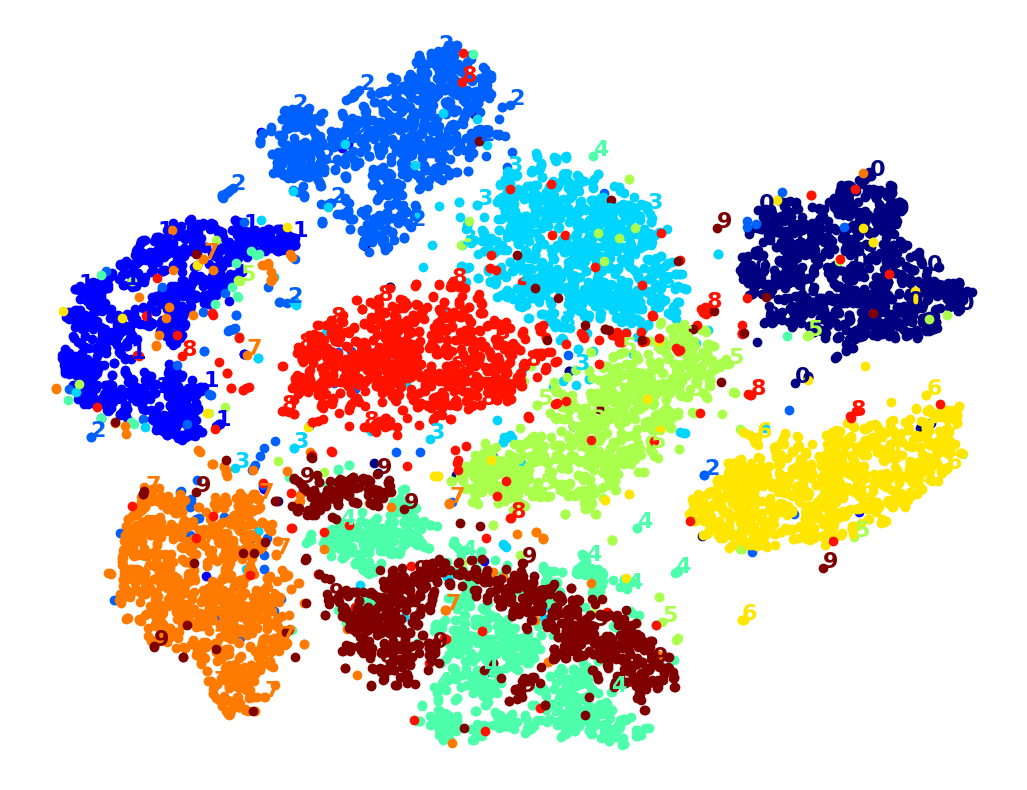

In [15]:
plot_digits(X_reduced, y)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15444\4080303330.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("jet")


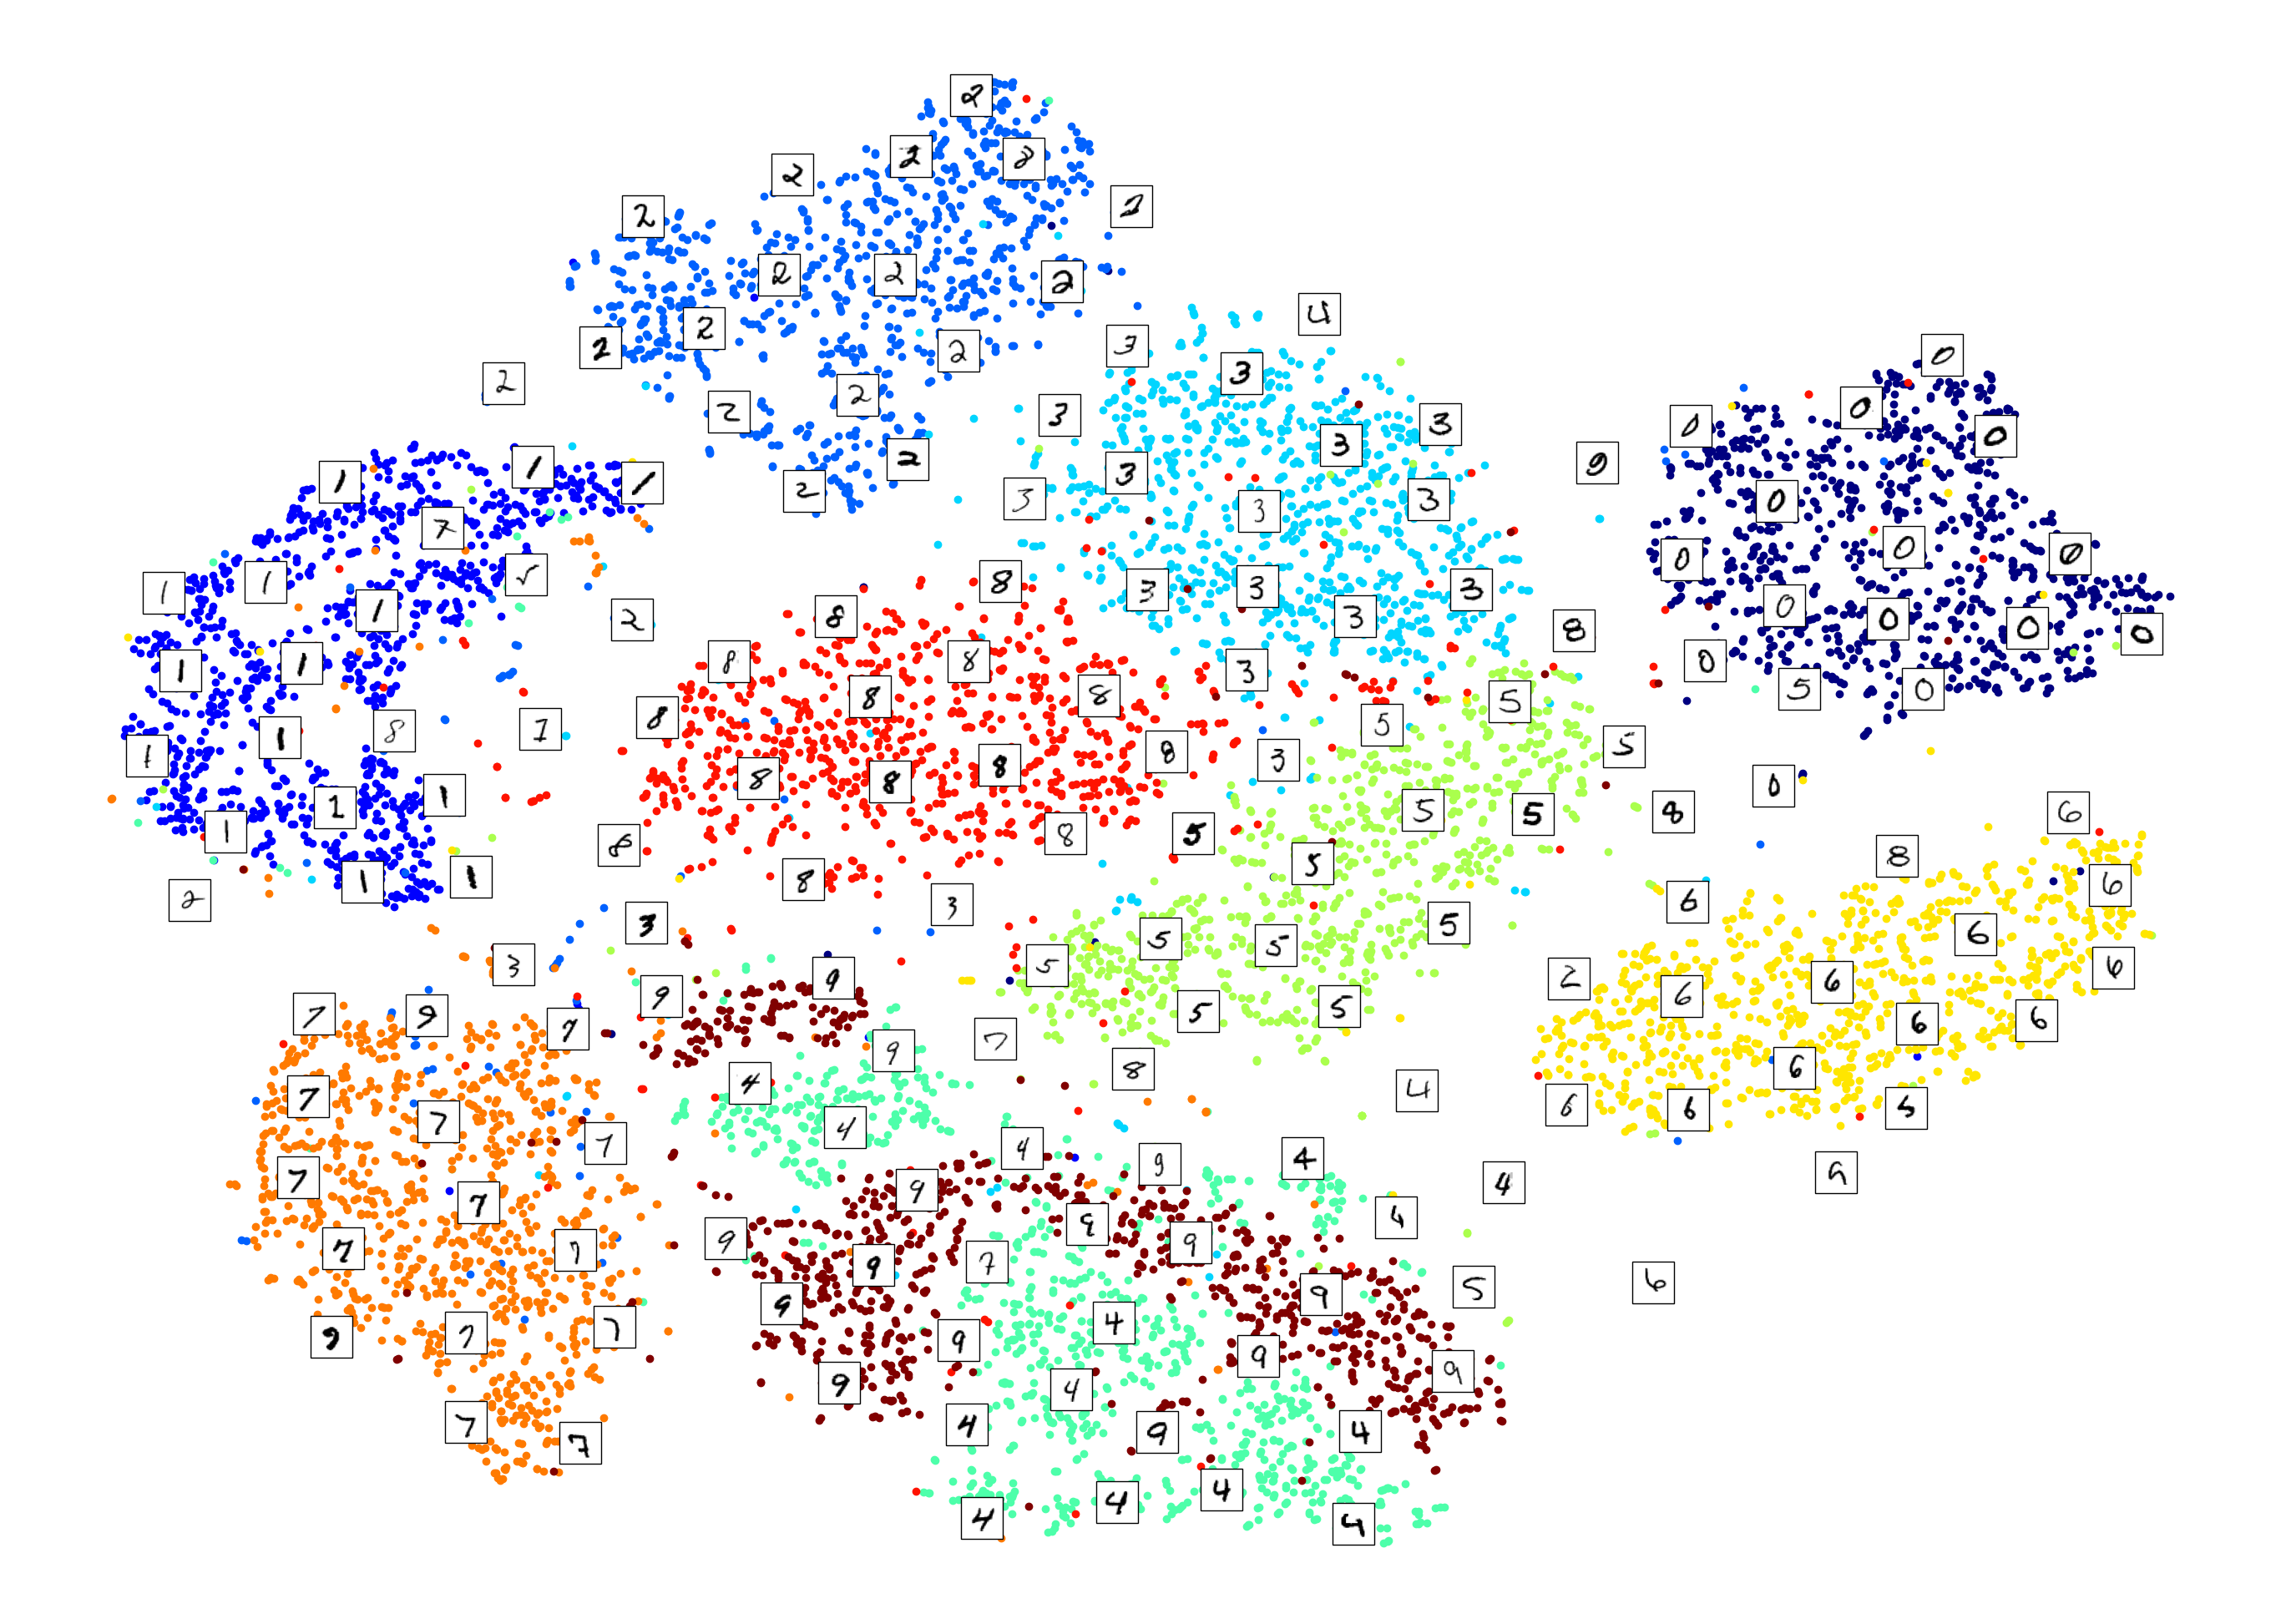

In [16]:
plot_digits(X_reduced, y, images=X, figsize=(35,25))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15444\4080303330.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("jet")


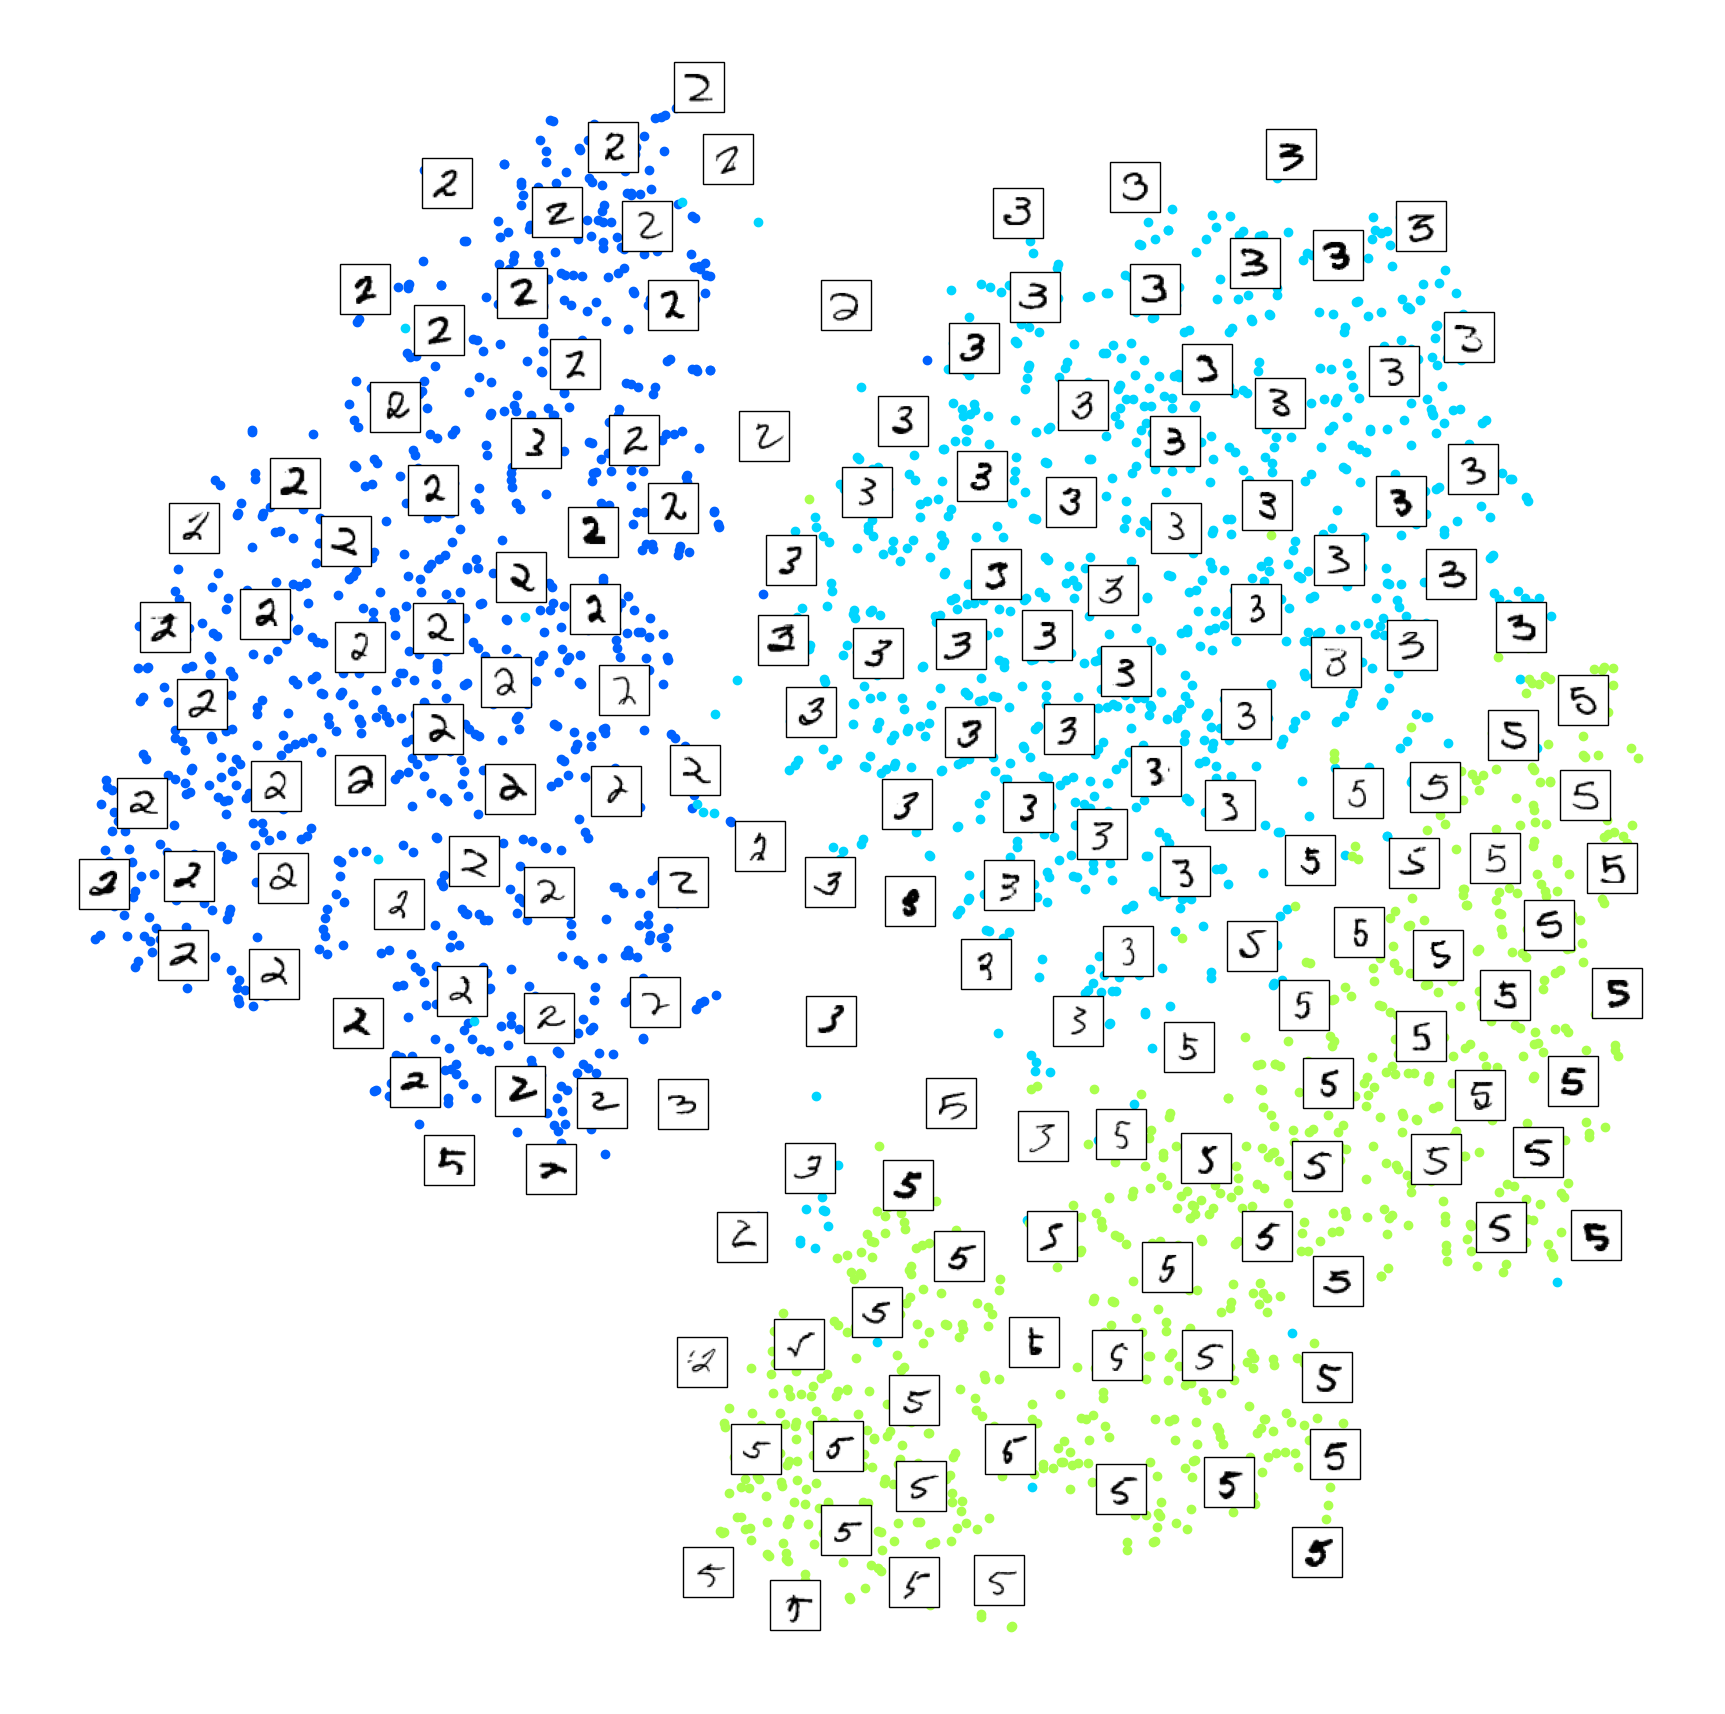

In [17]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))

PCA took 0.3s.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15444\4080303330.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("jet")


<function matplotlib.pyplot.show(close=None, block=None)>

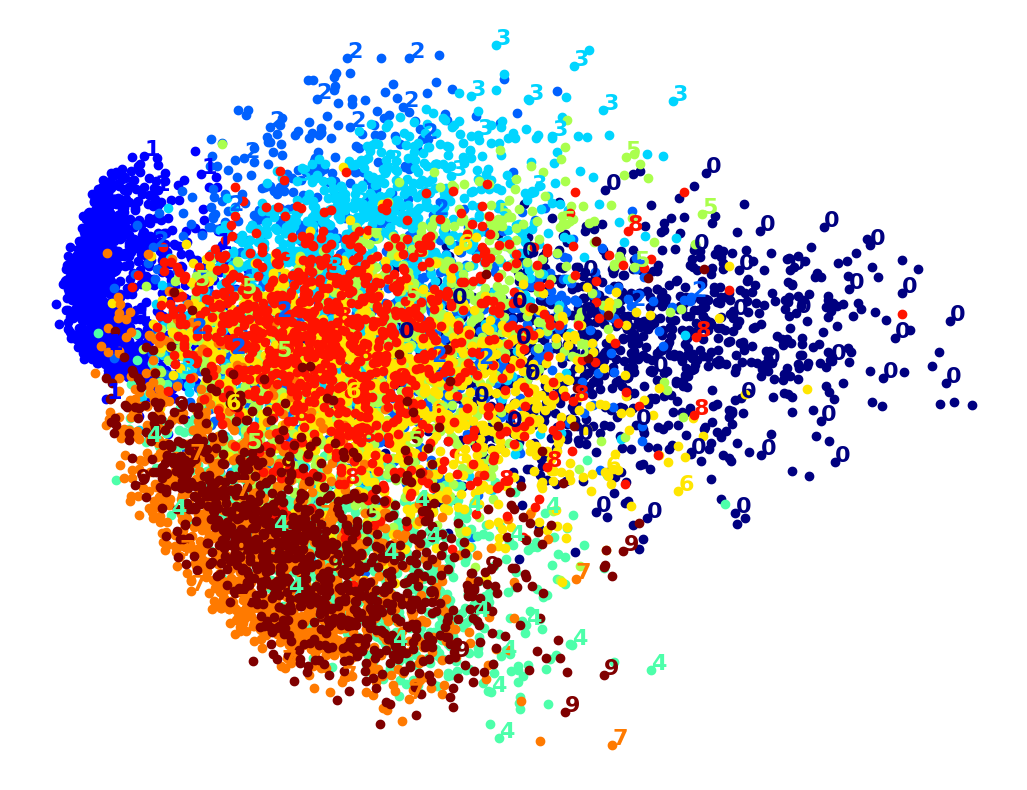

In [18]:
# Exercise : Try using other dimensionality reduction such as PCA, LLE, or \
# MDS and compare the resulting visualizations
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_reduced, y)
plt.show

LLE took 11.543344s


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15444\4080303330.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("jet")


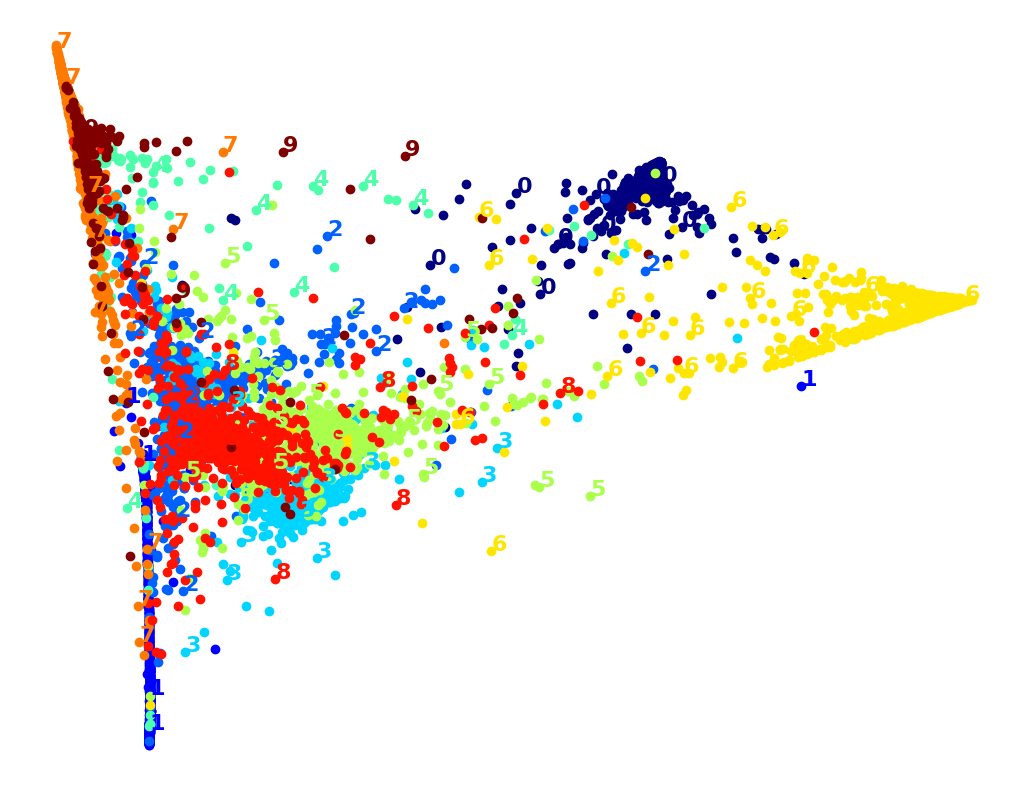

In [19]:
#PCA is really fast! But although we do see a few clusters, there's way too much overlap.
# Thus we try LLE
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE took {:1f}s".format(t1 - t0))
plot_digits(X_lle_reduced, y)
plt.show()

PCA+LLE took 11.5s


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15444\4080303330.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("jet")


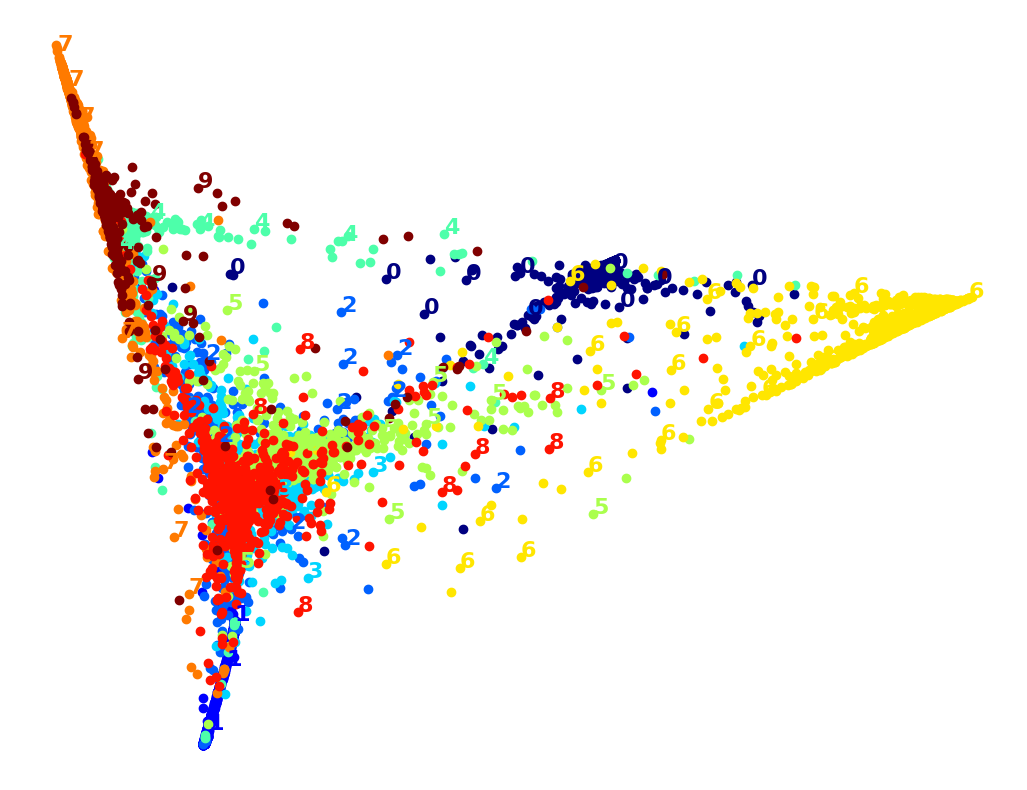

In [20]:
# It took a while ,and the result does not look too good.Thus we see what happens
# if we apply PCA first, preserving 95% of the variance
from sklearn.pipeline import Pipeline

pca_lle  = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),

])
t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)  
t1 = time.time()
print("PCA+LLE took {:.1f}s".format(t1 - t0))
plot_digits(X_pca_lle_reduced, y)
plt.show()

MDS took 198.4s (on just 2000 MNIST images instead of 10000).


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15444\4080303330.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("jet")


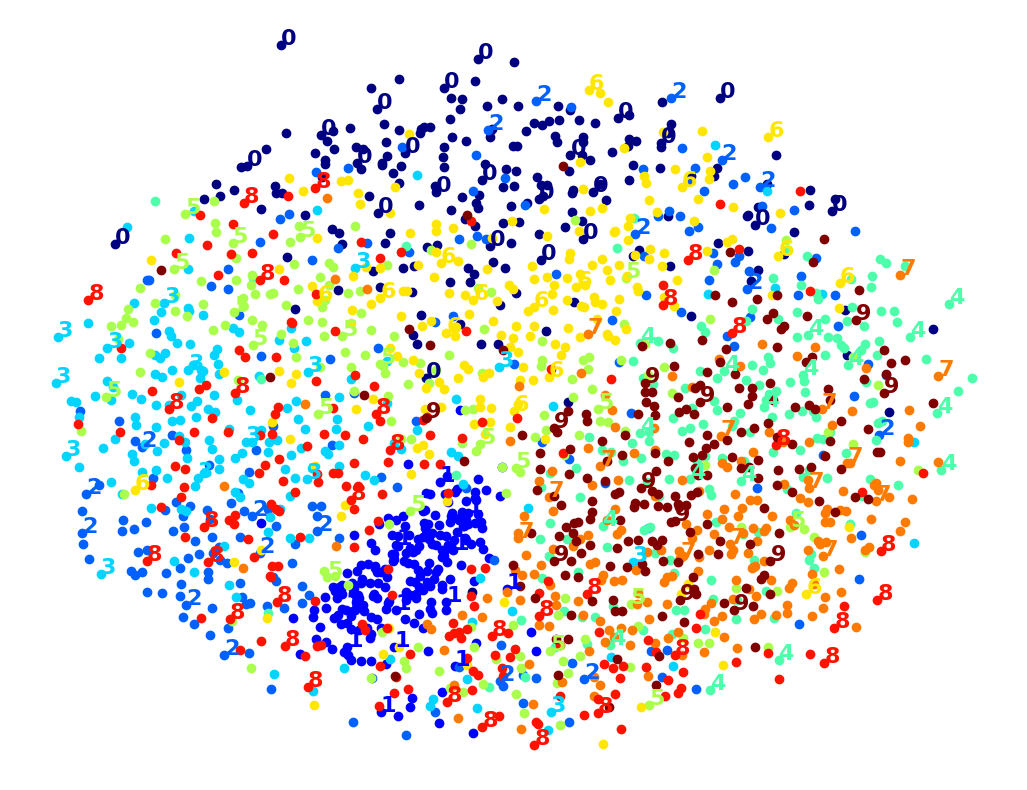

In [21]:
# Now we try MDS.It will take long to run it on 10000 instances thus we take
# only 2000 for now
from sklearn.manifold import MDS

m = 2000
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t1 = time.time()
print("MDS took {:.1f}s (on just 2000 MNIST images instead of 10000).".format(t1 - t0))
plot_digits(X_mds_reduced, y[:m])
plt.show()

In [22]:
# It took long to run and  in the  result, all clusters overlap too much.
# Thus we try PCA first, perhaps it may be faster

PCA+MDS took 187.6s (on 2000 MNIST images).


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15444\4080303330.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("jet")


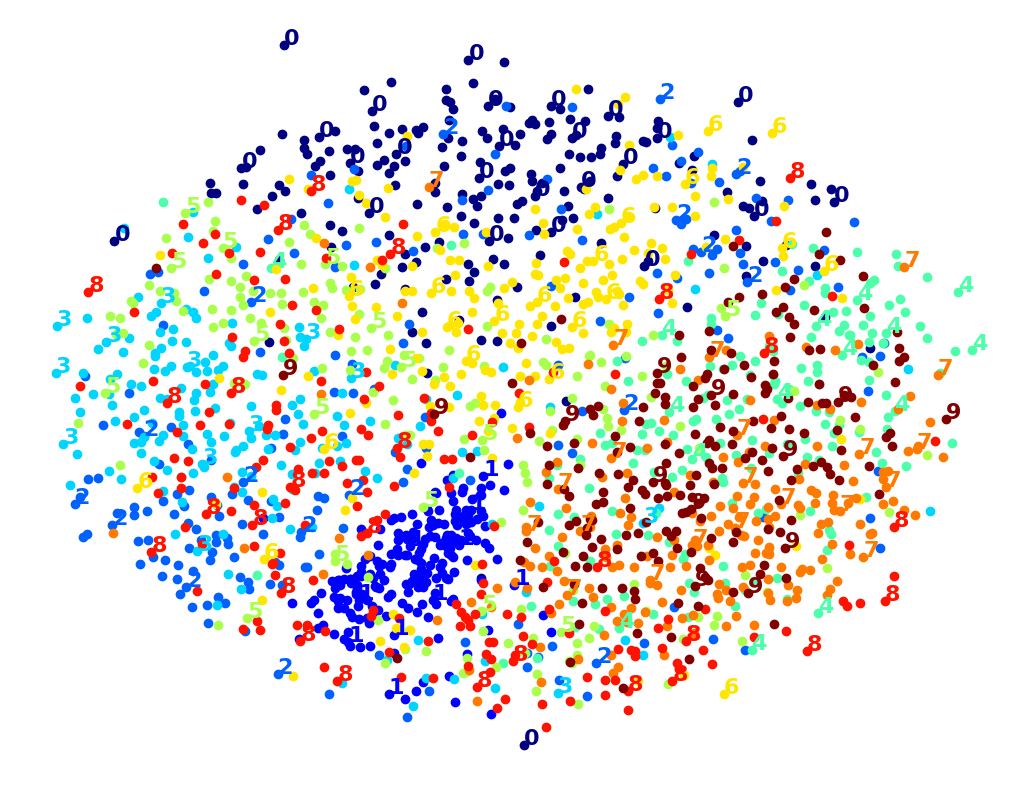

In [23]:
from sklearn.pipeline import Pipeline

pca_mds = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mds", MDS(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:2000])
t1 = time.time()
print("PCA+MDS took {:.1f}s (on 2000 MNIST images).".format(t1 - t0))
plot_digits(X_pca_mds_reduced, y[:2000])
plt.show()

LDA took 2.2.s


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15444\4080303330.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("jet")


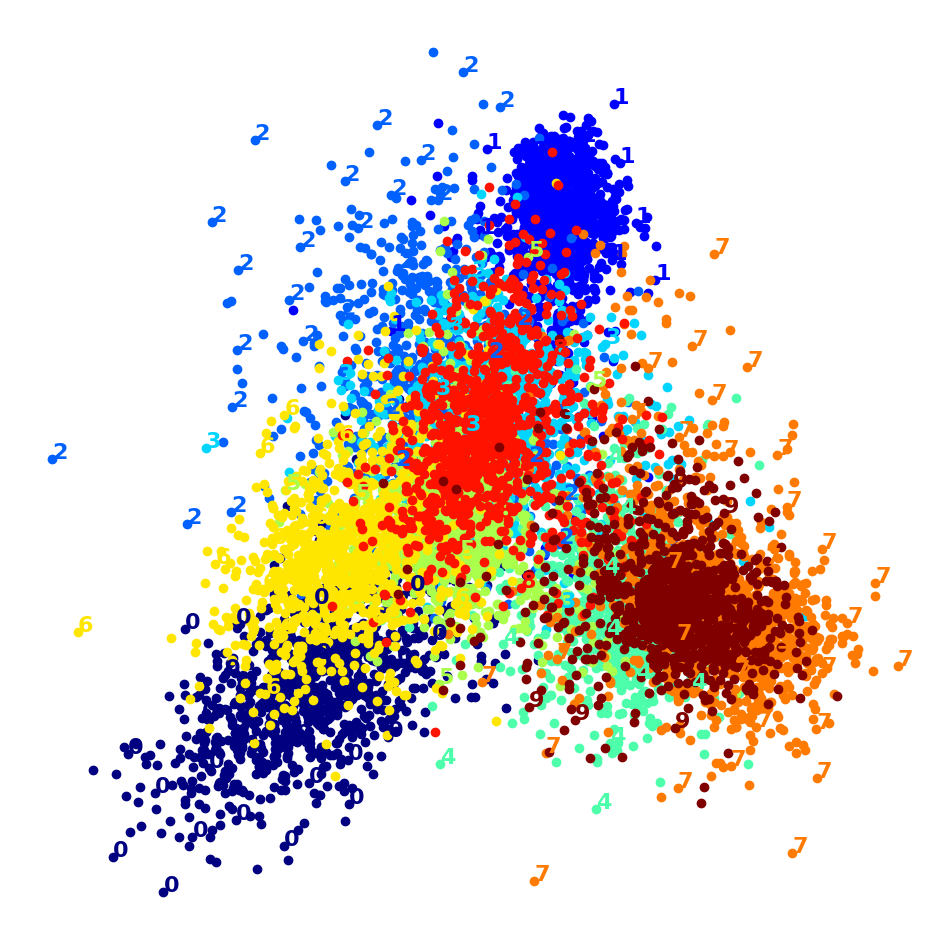

In [24]:
# Same result and no speedup thus PCA doesn't help or hurt
# Thus we try LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import time 

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA took {:.1f}.s".format(t1 - t0))
plot_digits(X_lda_reduced, y, figsize=(12,12))
plt.show()

t-SNE took 59.1s.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15444\4080303330.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("jet")


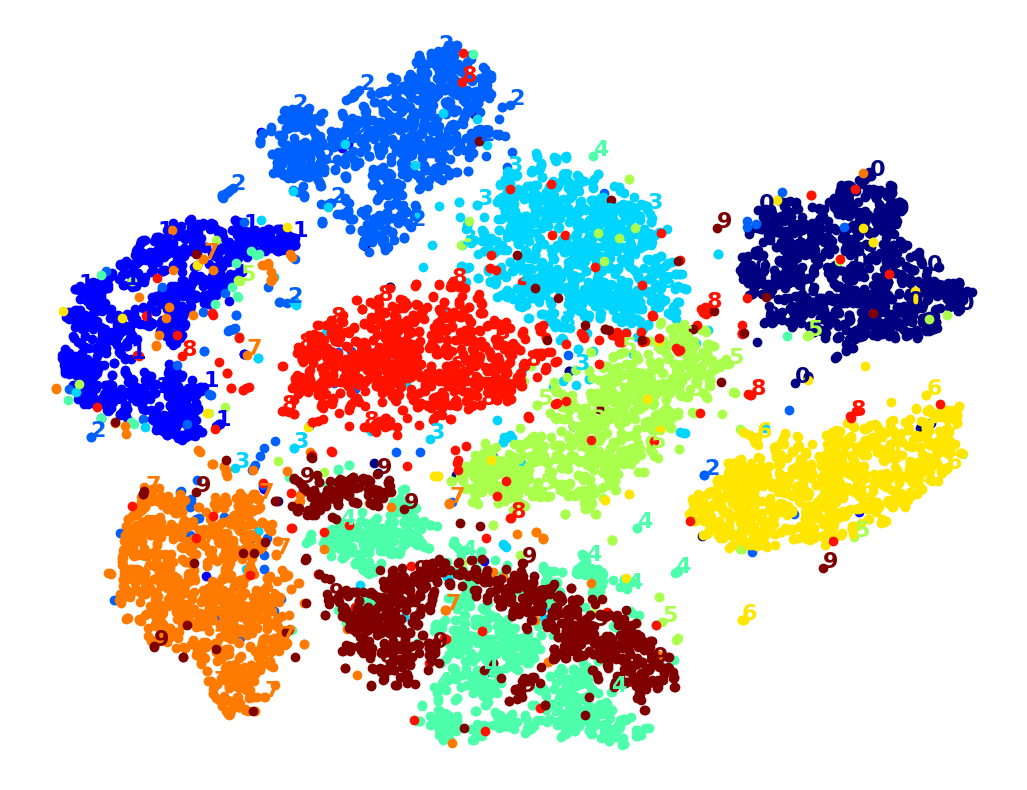

In [25]:
from sklearn.manifold import TSNE

t0 = time.time()
X_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_tsne_reduced, y)
plt.show()

PCA+t-SNE took 86.5s.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15444\4080303330.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("jet")


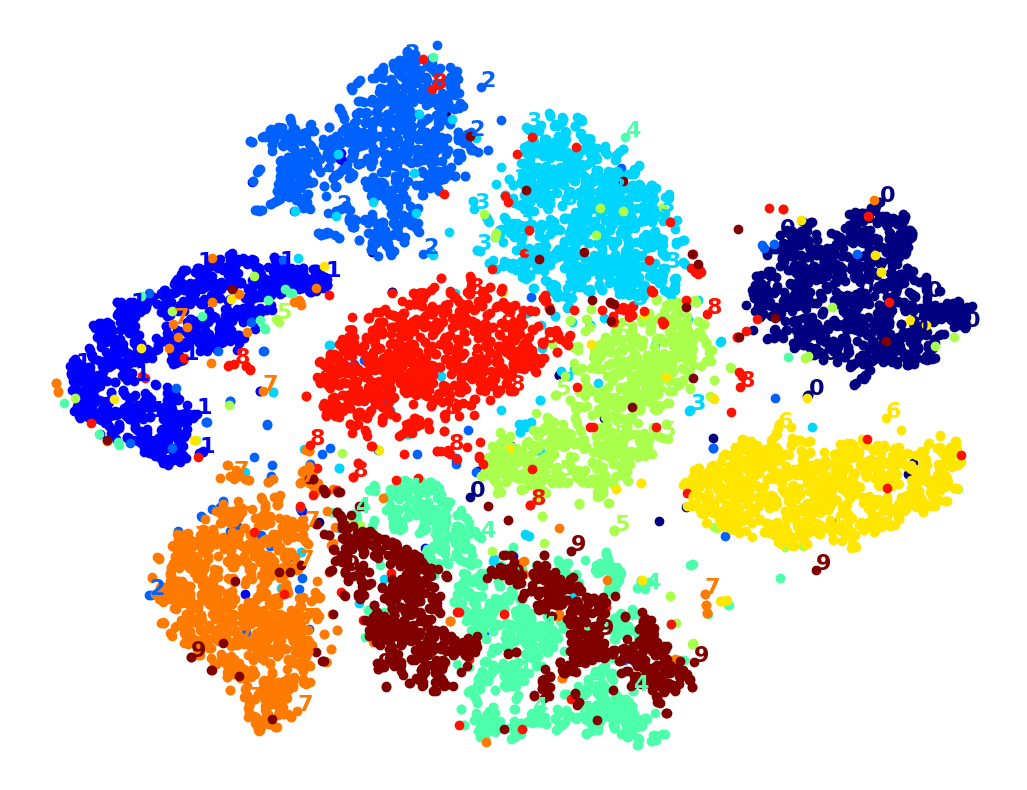

In [28]:
# To see if a bit of PCA can speed it up
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0)) 
plot_digits(X_pca_tsne_reduced,y)
plt.show()